In [3]:
import dynamic_backtesting as db
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [4]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [6]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH, Omega_t_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH,Omega_t_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR, Omega_t_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
Calculating weights for: EEM IVV IEV IXN IYR IXG EXI GC=F BZ=F HYG TLT
[*********************100%***********************]  11 of 11 completed
gjrGARCH11 detected


**Udregner performance**

In [56]:
res_ARCH, perf_table_ARCH = db.compare_strategies(v_t_ARCH, out_of_sample_s_ARCH,Omega_t_ARCH)
res_GARCH, perf_table_GARCH = db.compare_strategies(v_t_GARCH, out_of_sample_s_GARCH,Omega_t_GARCH)
res_GJR, perf_table_GJR = db.compare_strategies(v_t_GJR, out_of_sample_s_GJR,Omega_t_GJR)
print(v_t_GJR)


                 EEM       IVV       IEV       IXN       IYR       IXG  \
Date                                                                     
2017-10-12 -0.145409  0.528393 -0.034277 -0.094380 -0.049728 -0.065904   
2017-10-13 -0.139241  0.555774 -0.019250 -0.103021 -0.047381 -0.105797   
2017-10-16 -0.140250  0.586557 -0.013316 -0.112511 -0.046971 -0.117699   
2017-10-17 -0.133122  0.612269 -0.022903 -0.118134 -0.059111 -0.114514   
2017-10-18 -0.128018  0.626228 -0.028562 -0.117596 -0.057128 -0.112794   
...              ...       ...       ...       ...       ...       ...   
2021-09-27 -0.008529 -0.038113 -0.027620 -0.038977 -0.022360 -0.011569   
2021-09-28 -0.004995 -0.012459 -0.025698 -0.053903 -0.032815 -0.008489   
2021-09-29  0.013324 -0.091650 -0.052876 -0.050316  0.007481  0.033435   
2021-09-30  0.012197 -0.083220 -0.048804 -0.052359  0.002598  0.029089   
2021-10-01  0.011400 -0.091518 -0.038647 -0.041264 -0.003732  0.032857   

                 EXI      GC=F      B

**Sammensætter til en tabel**

In [43]:
#No trading cost first
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0,])
perf_table=perf_table.rename(index={'GARCH':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[2,])
perf_table=perf_table.append(perf_table_GJR.iloc[4,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold','Equal_weight':'Equal weight'})
#Trading cost
perf_table=perf_table.append(perf_table_ARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'ARCH(1) TC'})
perf_table=perf_table.append(perf_table_GARCH.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[1,])
perf_table=perf_table.rename(index={'GARCH TC':'GJR-GARCH(1,1) TC'})
perf_table=perf_table.append(perf_table_GJR.iloc[3,])
perf_table=perf_table.append(perf_table_GJR.iloc[5,])
perf_table=perf_table.rename(index={'BnH TC':'Buy and hold TC','Equal_weight TC':'Equal weight TC'})
print(perf_table.to_latex())


\begin{tabular}{lrrr}
\toprule
{} &  Ann. standard deviation &  Ann. return &  Ann. Sharpe ratio \\
\midrule
ARCH(1)           &                 0.076401 &     0.087236 &           1.141822 \\
GARCH(1,1)        &                 0.060930 &     0.063673 &           1.045021 \\
GJR-GARCH(1,1)    &                 0.064246 &     0.061492 &           0.957127 \\
Equal weight      &                 0.156527 &     0.117360 &           0.749775 \\
Buy and hold      &                 0.082925 &     0.098272 &           1.185066 \\
ARCH(1) TC        &                 0.076391 &     0.082903 &           1.085241 \\
GARCH(1,1) TC     &                 0.060931 &     0.063469 &           1.041659 \\
GJR-GARCH(1,1) TC &                 0.064247 &     0.061157 &           0.951914 \\
Equal weight TC   &                 0.156527 &     0.117358 &           0.749760 \\
Buy and hold TC   &                 0.082925 &     0.098270 &           1.185041 \\
\bottomrule
\end{tabular}



**Laver en tabel af afkast**

In [52]:
res=res_ARCH.drop(columns=['GARCH TC','Equal_weight', 'BnH','Equal_weight TC','BnH TC']).rename(columns={'GARCH':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH"]
res["Equal weight"]=res_GJR["Equal_weight"]
res["Buy and hold"]=res_GJR["BnH"]
res["ARCH(1) TC"]=res_ARCH["GARCH TC"]
res["GARCH(1,1) TC"]=res_GARCH["GARCH TC"]
res["GJR-GARCH(1,1) TC"]=res_GJR["GARCH TC"]
res["Equal weight TC"]=res_GJR["Equal_weight TC"]
res["Buy and hold TC"]=res_GJR["BnH TC"]

In [53]:
res

,ARCH(1),"GARCH(1,1)","GJR-GARCH(1,1)",Equal weight,Buy and hold,ARCH(1) TC,"GARCH(1,1) TC","GJR-GARCH(1,1) TC",Equal weight TC,Buy and hold TC
Date,,,,,,,,,,
2017-10-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-10-13,1.001945,1.000576,1.000798,1.004879,1.001063,1.001945,1.000576,1.000798,1.004879,1.001063
2017-10-16,1.002313,1.001546,1.001740,1.005585,1.002122,1.002313,1.001546,1.001739,1.005585,1.002122
2017-10-17,1.003379,1.003145,1.003387,1.003397,1.003355,1.003378,1.003145,1.003387,1.003397,1.003355
2017-10-18,1.001942,1.001813,1.001916,1.004581,1.001654,1.001941,1.001813,1.001916,1.004581,1.001654
...,...,...,...,...,...,...,...,...,...,...
2021-09-27,1.402006,1.277672,1.265794,1.539849,1.469907,1.378003,1.276633,1.264106,1.539835,1.469896
2021-09-28,1.394780,1.275301,1.262923,1.516980,1.453349,1.370891,1.274263,1.261239,1.516966,1.453337
2021-09-29,1.396273,1.277991,1.265318,1.514932,1.457151,1.372324,1.276951,1.263629,1.514919,1.457140


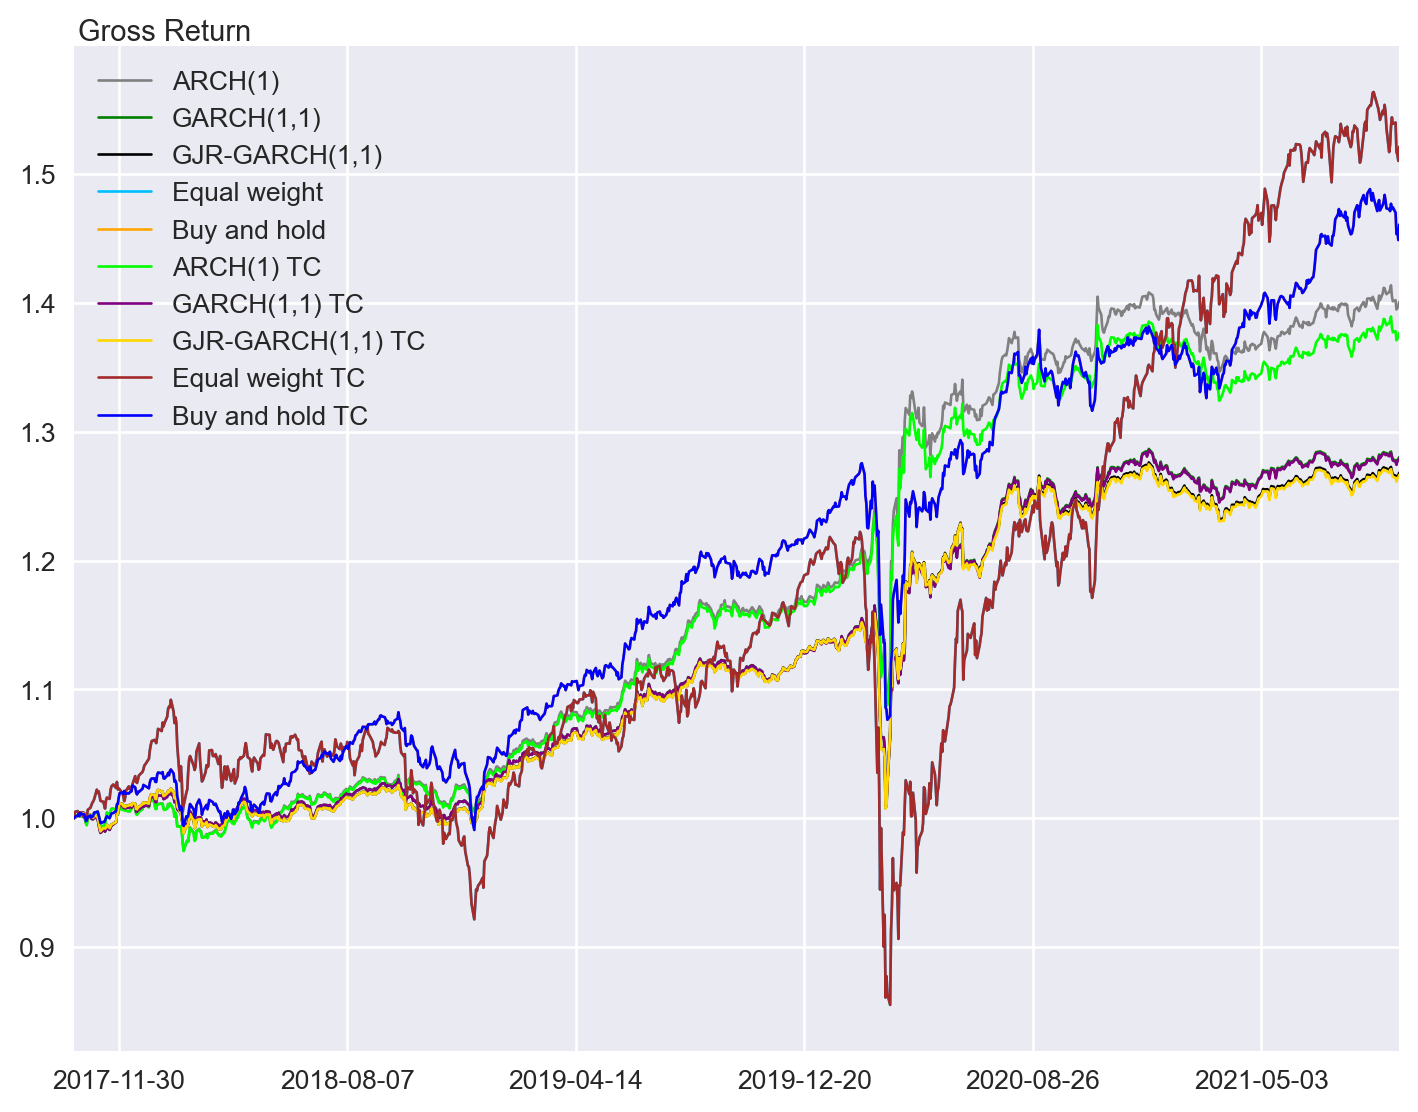

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Backtesting\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)


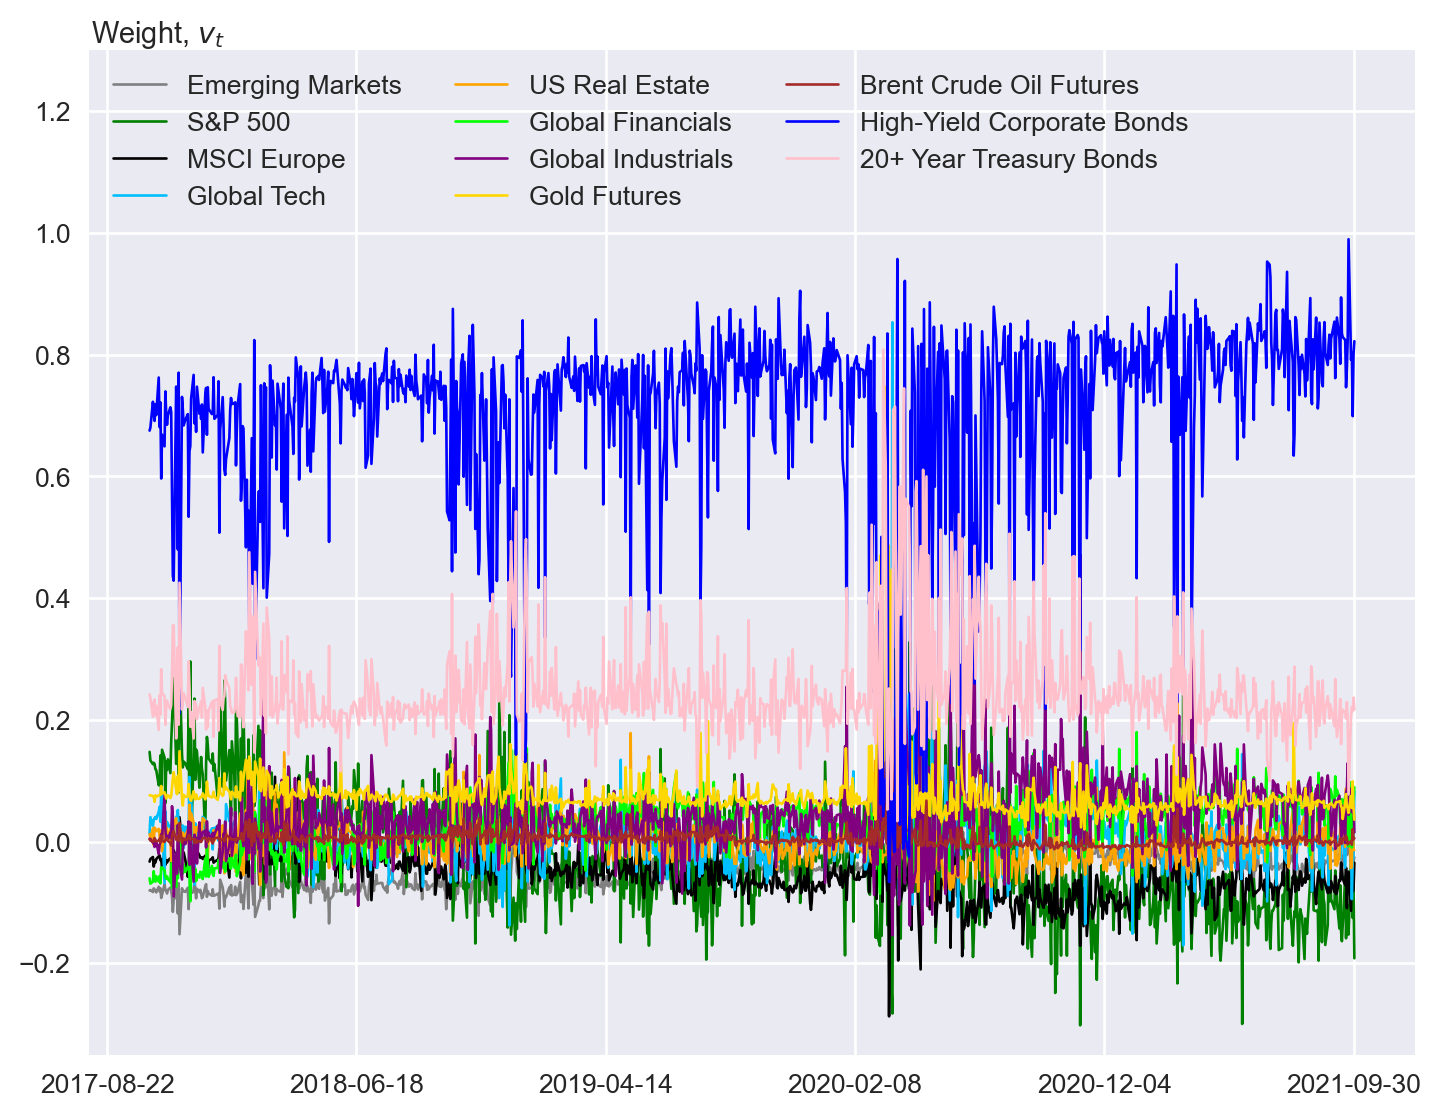

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\ARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

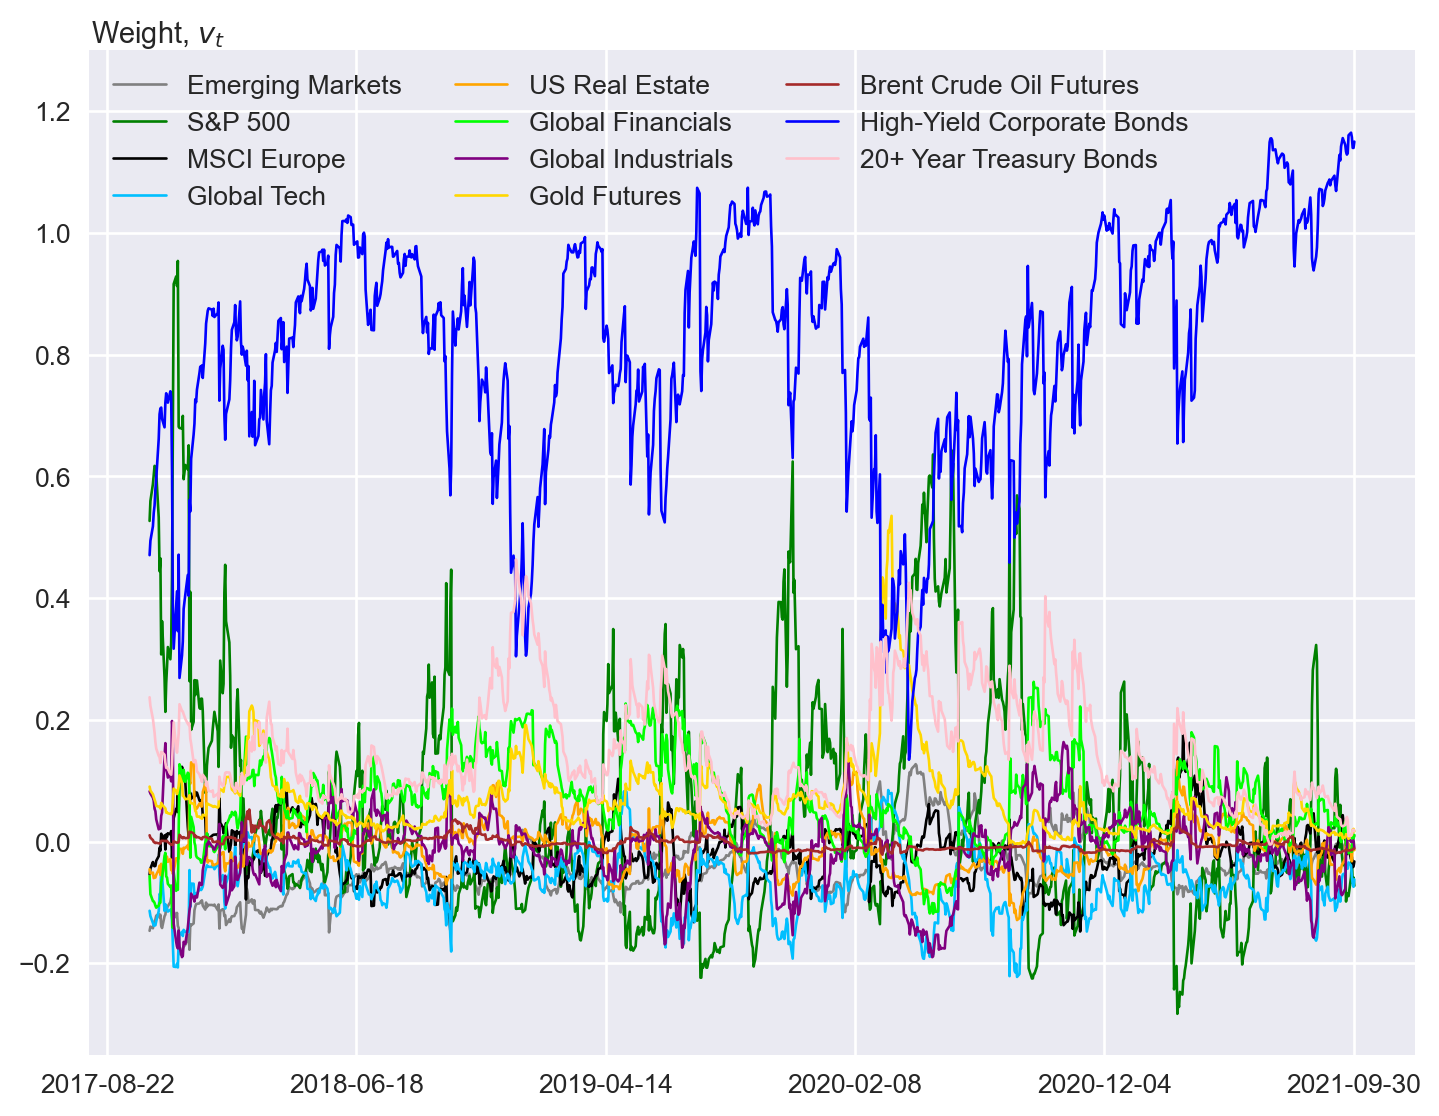

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\GARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)

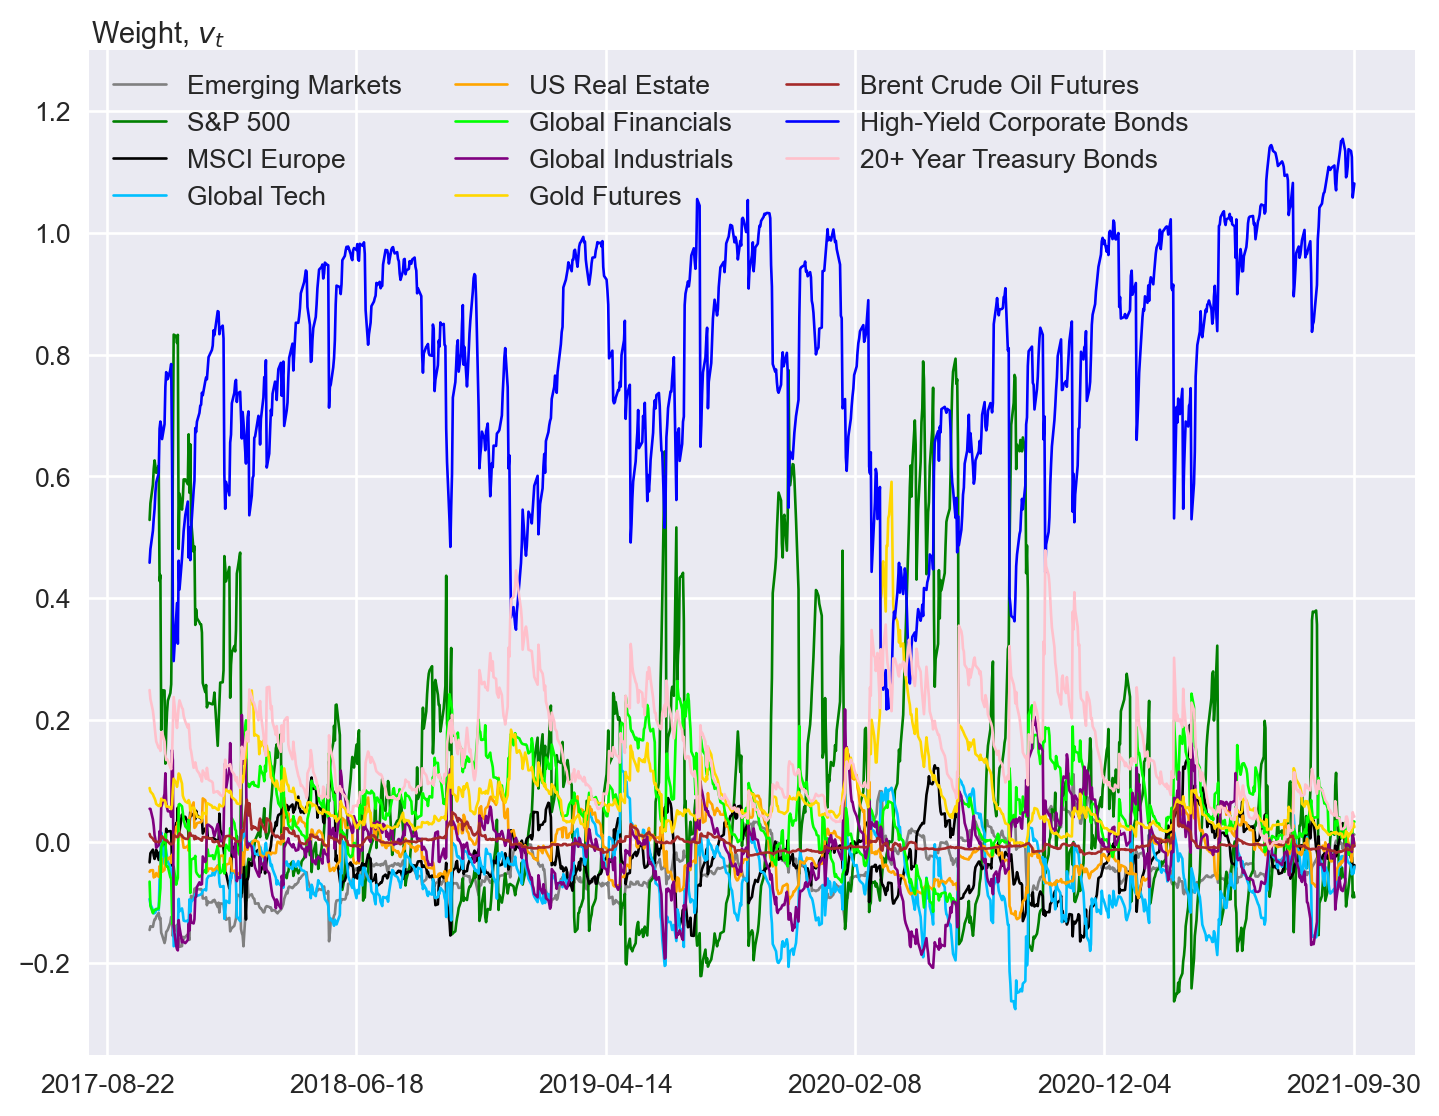

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\GJRGARCH_weight_NO_TC.png", bbox_inches = 'tight', pad_inches = 0.1)